In [ ]:
# run this command to have the same execution environement 
!pip3 install -r requirements.txt

In [ ]:
!pip3 install -U nltk[twitter]

In [95]:
import pickle
import numpy as np
import pandas as pd
import os
import re
import preprocessor.preprocessor as p
from gensim.parsing.preprocessing import remove_stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud
import itertools

%matplotlib inline

In [24]:
def preprocess(txt):
    txt = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", txt)
    txt = txt.lower()
    txt = re.sub(r"\W"," ",txt)
    txt = re.sub(r"\d"," ",txt)
    txt = re.sub(r"\s+[a-z]\s+"," ",txt)
    txt = re.sub(r"\s+[a-z]$"," ",txt)
    txt = re.sub(r"^[a-z]\s+"," ",txt)
    txt = re.sub(r"\s+"," ",txt) 
    return txt

In [6]:
os.listdir()

['.ipynb_checkpoints',
 '.venv',
 'env_for_req.py',
 'preprocessor',
 'requirements.txt',
 'Topic_modeling_tweets.ipynb',
 'Tweets for Analysis_KNS_Data',
 'Untitled.ipynb']

In [7]:
corp=[]
root='Tweets for Analysis_KNS_Data'
for folder, subfolders, filenames in  os.walk(root):
    for file in filenames:
        print(file)
        with open(os.path.join(root,file),mode='r',encoding='utf-8') as f:
             a=pd.read_csv(f)
             a["text"]=a["text"].apply(lambda x:p.clean(x))
             a["text"]=a["text"].apply(lambda x:remove_stopwords(x))
             a['text'] = a['text'].apply(lambda x:preprocess(x))
             corp.append(a)
    del a

Tweets for Analysis_KNS - After.csv
Tweets for Analysis_KNS - Before.csv
Tweets for Analysis_KNS - During.csv


In [83]:
#Pickling the list of processed dataframe
with open('list_proc_tweetdf', 'wb') as f:
    pickle.dump(corp,f)
#To load the file  the list of processed dataframe:

# with open('list_proc_tweetdf', 'rb') as f:
#      corp = pickle.load(f)

In [8]:
before=corp[1]
during=corp[2]
after=corp[0]

In [9]:
before.head()

,screen_name,Year,Month,Date,text,likes,replies,retweets
0,twistnshout58,2018,11,25,well the good news skirted poorly so guess got...,0,0,0
1,MarkSZaidEsq,2018,11,25,met primary ppl witnesses assassination autho...,0,1,0
2,schneiderleonid,2018,11,25,perfectly free lie the confidential documents ...,1,1,1
3,MuckRock,2018,11,25,muckrock wants share pretty baby pupper photos...,2,0,0
4,ivriblack,2018,11,25,us gov loses landmark lawsuit,0,0,0


In [10]:
before.describe()

,Year,Month,Date,likes,replies,retweets
count,1765.0,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000
mean,2018.0,11.797167,16.477054,26.066289,0.822663,9.150142
std,0.0,0.402223,8.660919,628.073810,5.935189,105.924960
min,2018.0,11.000000,1.000000,0.000000,0.000000,0.000000
25%,2018.0,12.000000,10.000000,0.000000,0.000000,0.000000
50%,2018.0,12.000000,17.000000,1.000000,0.000000,1.000000
75%,2018.0,12.000000,25.000000,5.000000,0.000000,3.000000
max,2018.0,12.000000,30.000000,26233.000000,192.000000,4104.000000


In [12]:
print(before.count(),'/t',during.count(),'/t',after.count())

screen_name    1765
Year           1765
Month          1765
Date           1765
text           1765
likes          1765
replies        1765
retweets       1765
dtype: int64 /t screen_name    1869
Year           1869
Month          1869
Date           1869
text           1869
likes          1869
replies        1869
retweets       1869
dtype: int64 /t screen_name    1644
Year           1644
Month          1644
Date           1644
text           1644
likes          1644
replies        1644
retweets       1644
dtype: int64


In [13]:
print (before.isna().sum())
print (during.isna().sum())
print (after.isna().sum())

screen_name    0
Year           0
Month          0
Date           0
text           0
likes          0
replies        0
retweets       0
dtype: int64
screen_name    0
Year           0
Month          0
Date           0
text           0
likes          0
replies        0
retweets       0
dtype: int64
screen_name    0
Year           0
Month          0
Date           0
text           0
likes          0
replies        0
retweets       0
dtype: int64


### <center> TF-IDF Vectorization </center>

In [14]:
def TF_IDF(data):   
    tfidf = TfidfVectorizer(max_df=0.95, min_df=2,stop_words="english")
    dtm=tfidf.fit_transform(data['text'])
    return tfidf,dtm

In [15]:
vectorizer_before,dtm_before=TF_IDF(before)
vectorizer_during,dtm_during=TF_IDF(during)
vectorizer_after,dtm_after=TF_IDF(after)


In [16]:
print(f"we have a vocab of {len(vectorizer_before.vocabulary_) } unique words for before tweets")
print(f"Shape of the before tweets document term matrix {dtm_before.todense().shape}")

we have a vocab of 2496 unique words for before tweets
Shape of the before tweets document term matrix (1765, 2496)


In [17]:
print(f"we have a vocab of {len(vectorizer_during.vocabulary_) } unique words for during tweets")
print(f"Shape of the during tweets document term matrix {dtm_during.todense().shape}")

we have a vocab of 2278 unique words for during tweets
Shape of the during tweets document term matrix (1869, 2278)


In [18]:
print(f"we have a vocab of {len(vectorizer_after.vocabulary_) } unique words for after tweets")
print(f"Shape of the after tweets document term matrix {dtm_after.todense().shape}")

we have a vocab of 2410 unique words for after tweets
Shape of the after tweets document term matrix (1644, 2410)


### <center>Topic modeling using non negatif matrix factorization </center>

In [88]:
def get_topics(dtm,vectorizer,ntopics=7,nwords=15):
    nmf_model= NMF(n_components=ntopics)
    nmf_model.fit(dtm)
    topics=[]
    for index,topic in enumerate(nmf_model.components_):
        print(f'THE TOP {nwords} WORDS FOR TOPIC #{index}')
        print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
        topics.append([vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]])
        print('\n')
    return topics,nmf_model

In [89]:
topics_before,nmf_model_before=get_topics(dtm_before,vectorizer_before,ntopics=3,nwords=10)

THE TOP 10 WORDS FOR TOPIC #0
['second', 'headquarters', 'administrationâ', 'mortem', 'documents', 'released', 'known', 'far', 'collection', 'bid', 'plus', 'map', 'proposals', 'interactive', 'elore']


THE TOP 10 WORDS FOR TOPIC #1
['fincen', 'day', 'read', 'asked', 'soon', 'unroll', 'fin', 'story', 'thursday', 'dysfunction', 'chaos', 'investigative', 'reported', 'treasury', 'thread']


THE TOP 10 WORDS FOR TOPIC #2
['people', 'release', 'information', 'government', 'new', 'muckrock', 'foia', 'law', 'laws', 'request', 'department', 'requests', 'state', 'public', 'records']




In [91]:
topics_during,nmf_model_during=get_topics(dtm_during,vectorizer_during,ntopics=3,nwords=10)

THE TOP 10 WORDS FOR TOPIC #0
['attempt', 'petition', 'th', 'voice', 'kneecap', 'action', 'numbers', 'let', 'don', 'zinke', 'secrecy', 'remains', 'legacy', 'leaving', 'dismantle']


THE TOP 10 WORDS FOR TOPIC #1
['accountable', 'foia', 'know', 'story', 'info', 'processing', 'law', 'claiming', 'result', 'circumventing', 'circumvents', 'people', 'trust', 'donâ', 'anymore']


THE TOP 10 WORDS FOR TOPIC #2
['proposed', 'agency', 'dept', 'transparency', 'laws', 'department', 'know', 'government', 'new', 'information', 'interior', 'requests', 'state', 'public', 'records']




In [93]:
topics_after,nmf_model_after=get_topics(dtm_after,vectorizer_after,ntopics=3,nwords=10)

THE TOP 10 WORDS FOR TOPIC #0
['lessons', 'result', 'info', 'related', 'circumventing', 'claiming', 'circumvents', 'probably', 'american', 'accountability', 'congress', 'people', 'trust', 'anymore', 'donâ']


THE TOP 10 WORDS FOR TOPIC #1
['purchase', 'store', 'swag', 'federal', 'exemptions', 'guide', 'pro', 'recently', 'reporters', 'accounts', 'laid', 'mini', 'offering', 'free', 'muckrock']


THE TOP 10 WORDS FOR TOPIC #2
['know', 'transparency', 'help', 'open', 'act', 'government', 'foia', 'documents', 'state', 'information', 'request', 'requests', 'new', 'records', 'public']




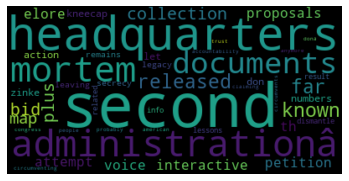

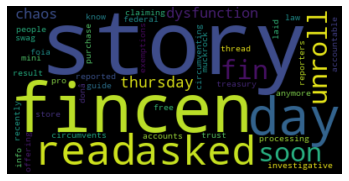

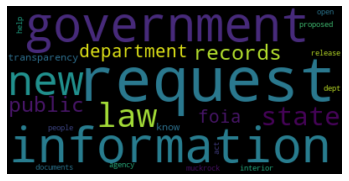

In [99]:

# Create and generate a word cloud image:
for elem in zip(topics_before,topics_during,topics_after):
    wordcloud = WordCloud(max_words=50).generate(' '.join(list(itertools.chain.from_iterable(elem))))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

<center> <h3> Lets attach the discovered Topic Labels to the Original documents </h3></center>

In [76]:
def append_topic(nmf_model,dtm,data,col_name='Topic'):
    topic_results = nmf_model.transform(dtm)
    data[col_name]=topic_results.argmax(axis=1)

In [77]:
append_topic(nmf_model_before,dtm_before,before)
before.head(5)

,screen_name,Year,Month,Date,text,likes,replies,retweets,score,compound,sent,Topic
0,twistnshout58,2018,11,25,well the good news skirted poorly so guess got...,0,0,0,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.6124,pos,2
1,MarkSZaidEsq,2018,11,25,met primary ppl witnesses assassination autho...,0,1,0,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...",-0.6705,neg,2
2,schneiderleonid,2018,11,25,perfectly free lie the confidential documents ...,1,1,1,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",0.7311,pos,2
3,MuckRock,2018,11,25,muckrock wants share pretty baby pupper photos...,2,0,0,"{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp...",0.6597,pos,2
4,ivriblack,2018,11,25,us gov loses landmark lawsuit,0,0,0,"{'neg': 0.56, 'neu': 0.267, 'pos': 0.173, 'com...",-0.4404,neg,2


In [78]:
append_topic(nmf_model_during,dtm_during,during)
during.head(5)

,screen_name,Year,Month,Date,text,likes,replies,retweets,score,compound,sent,Topic
0,NuclearAnthro,2019,1,1,the reading room gems conplan zombies â,11,1,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,2
1,NuclearAnthro,2019,1,1,scholarly activity writing requests for curren...,36,4,2,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2732,pos,2
2,william_summers,2019,1,1,in mention ridiculous battle parliament house ...,15,3,19,"{'neg': 0.317, 'neu': 0.683, 'pos': 0.0, 'comp...",-0.6249,neg,2
3,thememoryhole2,2019,1,1,the latest documents obtained government attic...,9,0,6,"{'neg': 0.095, 'neu': 0.795, 'pos': 0.11, 'com...",0.1027,pos,2
4,thememoryhole2,2019,1,1,the university mississippi entity allowed grow...,4,1,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,2


In [79]:
append_topic(nmf_model_after,dtm_after,after)
after.head(5)

,screen_name,Year,Month,Date,text,likes,replies,retweets,score,compound,sent,Topic
0,stacyojackson,2019,1,31,covers new solution built help orgs manage re...,3,0,1,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.6124,pos,2
1,MuckRock,2019,1,31,muckrock offering free mini pro accounts recen...,3,0,5,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.5106,pos,1
2,thememoryhole2,2019,1,31,sebastian gorka given guest lectures marine co...,26,3,12,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.2960,neg,2
3,AltWeeklies,2019,1,31,we joined â œamicus letterâ mann competitive e...,1,0,0,"{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'comp...",0.1779,pos,2
4,AltWeeklies,2019,1,31,the issue courthouse news service yamasaki inv...,1,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,2


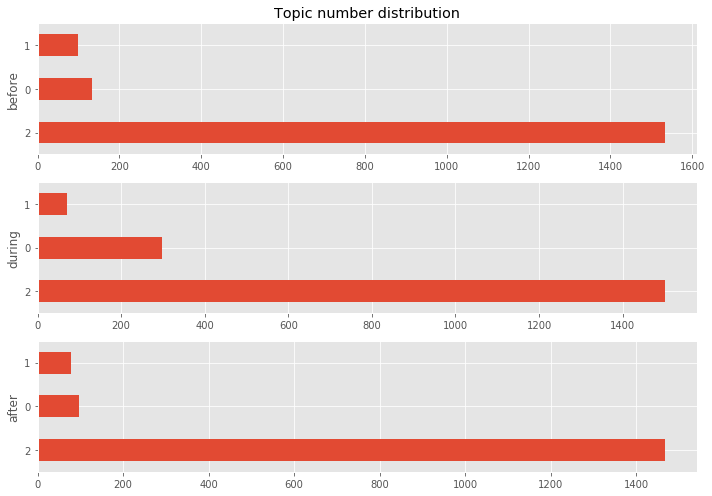

In [81]:
plt.style.use('ggplot')
fig,ax=plt.subplots(3,1,figsize=(10,7))
before['Topic'].value_counts().plot(kind='barh',ax=ax[0],
                                    title="Topic number distribution")
during['Topic'].value_counts().plot(kind='barh',ax=ax[1])
after['Topic'].value_counts().plot(kind='barh',ax=ax[2])
ax[0].set_ylabel('before')
ax[1].set_ylabel('during')
ax[2].set_ylabel('after')
plt.tight_layout()
plt.show()

<center> <h3> Sentiment Analysis using NLTK VADER </h3></center>

In [37]:
sid = SentimentIntensityAnalyzer()
for df in (before,during,after):
    df['score']=df['text'].apply(lambda text: sid.polarity_scores(text))
    df['compound']=df['score'].apply(lambda score: score['compound'])
    df["sent"] = df['compound'].apply(lambda tweetscore: 'pos' if tweetscore >=0 else 'neg')  
    

In [39]:
before

,screen_name,Year,Month,Date,text,likes,replies,retweets,score,compound,sent
0,twistnshout58,2018,11,25,well the good news skirted poorly so guess got...,0,0,0,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.6124,pos
1,MarkSZaidEsq,2018,11,25,met primary ppl witnesses assassination autho...,0,1,0,"{'neg': 0.2, 'neu': 0.8, 'pos': 0.0, 'compound...",-0.6705,neg
2,schneiderleonid,2018,11,25,perfectly free lie the confidential documents ...,1,1,1,"{'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'comp...",0.7311,pos
3,MuckRock,2018,11,25,muckrock wants share pretty baby pupper photos...,2,0,0,"{'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'comp...",0.6597,pos
4,ivriblack,2018,11,25,us gov loses landmark lawsuit,0,0,0,"{'neg': 0.56, 'neu': 0.267, 'pos': 0.173, 'com...",-0.4404,neg
5,MuckRock,2018,11,25,looking master class transparency we ve compil...,5,0,2,"{'neg': 0.13, 'neu': 0.87, 'pos': 0.0, 'compou...",-0.1280,neg
6,MuckRock,2018,11,25,the file crowdsource unearthed new chapters gi...,3,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
7,MuckRock,2018,11,25,the agreement guides responsibilities departme...,0,1,2,"{'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...",0.4939,pos
8,probesreporter,2018,11,25,hey georgie fyi prisoners allowed file request...,0,0,0,"{'neg': 0.173, 'neu': 0.733, 'pos': 0.094, 'co...",-0.3612,neg
9,ficiesse,2018,11,25,comandi di direzione controllo presentato il r...,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [40]:
during

,screen_name,Year,Month,Date,text,likes,replies,retweets,score,compound,sent
0,NuclearAnthro,2019,1,1,the reading room gems conplan zombies â,11,1,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
1,NuclearAnthro,2019,1,1,scholarly activity writing requests for curren...,36,4,2,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp...",0.2732,pos
2,william_summers,2019,1,1,in mention ridiculous battle parliament house ...,15,3,19,"{'neg': 0.317, 'neu': 0.683, 'pos': 0.0, 'comp...",-0.6249,neg
3,thememoryhole2,2019,1,1,the latest documents obtained government attic...,9,0,6,"{'neg': 0.095, 'neu': 0.795, 'pos': 0.11, 'com...",0.1027,pos
4,thememoryhole2,2019,1,1,the university mississippi entity allowed grow...,4,1,3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
5,FOIcentric,2019,1,1,refusals highest level spiking recently secrec...,0,0,2,"{'neg': 0.13, 'neu': 0.748, 'pos': 0.122, 'com...",-0.0516,neg
6,ToddBohannon,2019,1,1,â œthe rule loosen timelines agency fulfill fr...,2,0,1,"{'neg': 0.14, 'neu': 0.584, 'pos': 0.276, 'com...",0.6705,pos
7,aprovendas,2019,1,1,que nã falta sã os fdp para defender atrocida...,2,0,0,"{'neg': 0.0, 'neu': 0.915, 'pos': 0.085, 'comp...",0.1027,pos
8,alanscereal,2019,1,1,if posted official government agency ruled can...,1,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
9,MuckRock,2019,1,1,homeland security claims canâ records posted w...,1,0,1,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.3400,pos


In [41]:
after

,screen_name,Year,Month,Date,text,likes,replies,retweets,score,compound,sent
0,stacyojackson,2019,1,31,covers new solution built help orgs manage re...,3,0,1,"{'neg': 0.0, 'neu': 0.615, 'pos': 0.385, 'comp...",0.6124,pos
1,MuckRock,2019,1,31,muckrock offering free mini pro accounts recen...,3,0,5,"{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.5106,pos
2,thememoryhole2,2019,1,31,sebastian gorka given guest lectures marine co...,26,3,12,"{'neg': 0.095, 'neu': 0.905, 'pos': 0.0, 'comp...",-0.2960,neg
3,AltWeeklies,2019,1,31,we joined â œamicus letterâ mann competitive e...,1,0,0,"{'neg': 0.0, 'neu': 0.892, 'pos': 0.108, 'comp...",0.1779,pos
4,AltWeeklies,2019,1,31,the issue courthouse news service yamasaki inv...,1,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
5,Bmore_history,2019,1,31,the invoked response request list accounts mut...,3,0,1,"{'neg': 0.208, 'neu': 0.792, 'pos': 0.0, 'comp...",-0.2732,neg
6,AltWeeklies,2019,1,31,we joined orgs brief drafted nat veterans lega...,1,0,1,"{'neg': 0.198, 'neu': 0.741, 'pos': 0.062, 'co...",-0.5106,neg
7,SCPressAssoc,2019,1,31,documents obtained request â,0,0,1,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
8,AltWeeklies,2019,1,31,aan joined amicus briefs end january the tweet...,1,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
9,ezra_lime,2019,1,31,unless bc liberals support putting bcleg bring...,1,0,0,"{'neg': 0.0, 'neu': 0.838, 'pos': 0.162, 'comp...",0.4019,pos


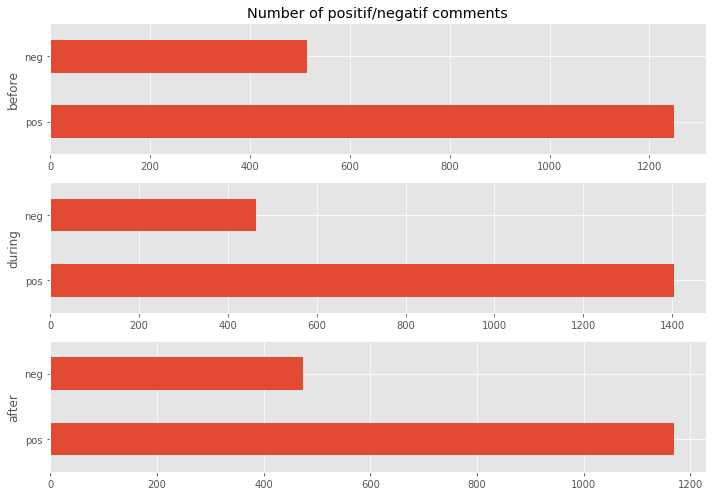

In [73]:
plt.style.use('ggplot')
fig,ax=plt.subplots(3,1,figsize=(10,7))
before['sent'].value_counts().plot(kind='barh',ax=ax[0],title="Number of positif/negatif comments")
during['sent'].value_counts().plot(kind='barh',ax=ax[1])
after['sent'].value_counts().plot(kind='barh',ax=ax[2])
ax[0].set_ylabel('before')
ax[1].set_ylabel('during')
ax[2].set_ylabel('after')
plt.tight_layout()
plt.show()